In [1]:
!pip install tfest

In [2]:
# import os
# os.chdir("..")

In [3]:
import base64
import requests

import matplotlib.pyplot as plt
import numpy as np

from scipy import signal
import tfest

In [4]:
def get_values_from_github():
  sin_sweep = requests.get("https://raw.githubusercontent.com/giuliovv/bldc_project_work/master/data/tfest/sin_sweep.csv").text
  after_filter = requests.get("https://raw.githubusercontent.com/giuliovv/bldc_project_work/master/data/tfest/after_filter.csv").text
  
  # Last value is empty
  sin_sweep = np.array(sin_sweep.split("\n")[:-1]).astype(float)
  after_filter = np.array(after_filter.split("\n")[:-1]).astype(float)
  
  return sin_sweep, after_filter

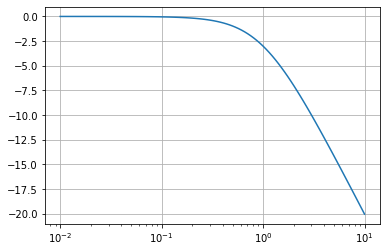

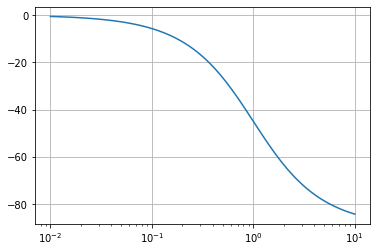

In [5]:
s1 = signal.lti([1], [1, 1])
w, mag, phase = s1.bode()
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.grid()
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.grid()
plt.show()

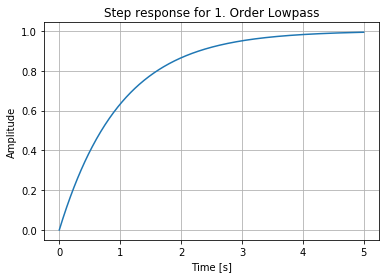

In [6]:
t = np.linspace(0, 5, num=500)
u = np.ones_like(t)
tout, y, x = signal.lsim(s1, u, t)
plt.plot(t, y)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response for 1. Order Lowpass')
plt.grid()

In [7]:
u, y = get_values_from_github()

In [8]:
te = tfest.tfest(u=u, y=y)

In [9]:
te.estimate(nzeros=0, npoles=1, init_value=1, method="fft", time=10)

Optimization terminated successfully.
         Current function value: 6.210674
         Iterations: 32
         Function evaluations: 58


 final_simplex: (array([[1.13049585, 1.26372785, 0.5517918 ],
       [1.13065354, 1.26350626, 0.55304756],
       [1.13123992, 1.26497512, 0.55153654],
       [1.13154112, 1.26322844, 0.55222727]]), array([6.21067428, 6.21069523, 6.21074738, 6.21075254]))
           fun: 6.2106742794946115
       message: 'Optimization terminated successfully.'
          nfev: 58
           nit: 32
        status: 0
       success: True
             x: array([1.13049585, 1.26372785, 0.5517918 ])

In [10]:
te.get_transfer_function()

TransferFunctionContinuous(
array([2.04877246]),
array([1.        , 2.29022586]),
dt: None
)

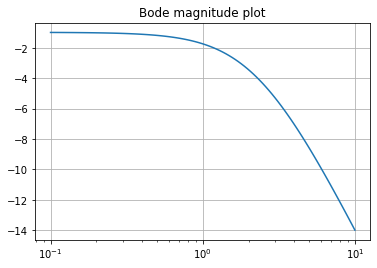

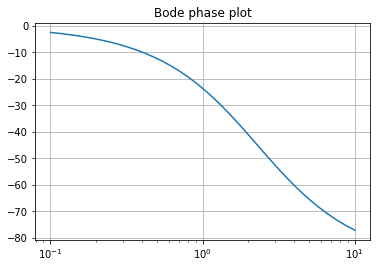

In [11]:
te.plot_bode()

/home/giulio/prog/.virtualenv/ML/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


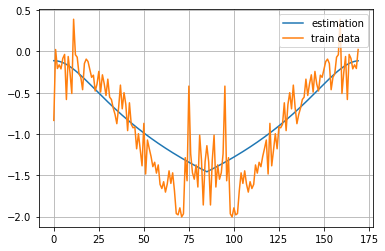

In [12]:
te.plot()